# Testing Different ML Algorithms for Harvest Stage Prediction

In [14]:
# Load libraries
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

## Load the harvest data from a CSV file

In [15]:
dataset_base = pandas.read_csv('FINAL_HARVEST_DF.csv', sep= ',', header=0, index_col=0)

## Scale the data

In [16]:
scaler = MinMaxScaler()
dataset_base[['imu_mean', 'weight_slope', 'weight_mean', 'temperature_mean']] = scaler.fit_transform(dataset_base[['imu_mean', 'weight_slope', 'weight_mean', 'temperature_mean']])

## Save the dataset from node Nr.3 for later validation 

In [17]:
dataset_node3 = dataset_base[(dataset_base.id_device == 3)]
# Split-out validation dataset
array = dataset_node3.values
X3_validation = array[:, 2:6] # columns: imu_mean, weight_slope, weight_mean and temperature_mean
Y3_validation = array[:,-1:] # only the stae column

## Get the dataset from the rest nodes to compare the different ML models

In [18]:
dataset = dataset_base[(dataset_base.id_device == 1) | (dataset_base.id_device == 2) | (dataset_base.id_device == 4)| (dataset_base.id_device == 5)]

## Split the data for model construction and validation (80% and 20%) respectivelly

In [19]:
# The whole harvest dataset
array = dataset.values

# X contains only the columns: imu_mean, weight_slope, weight_mean and temperature_mean
X = array[:, 2:6] 

# Y contains only the column: stage 
Y = array[:,-1:] 

# Split-out training and validation datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, 
                                                                                Y, 
                                                                                test_size=validation_size, 
                                                                                random_state=seed)

## Model Comparison

In [20]:
# Define algorithms to evaluate
models = []
results = []
names = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, 
                                                 X_train, 
                                                 Y_train, 
                                                 cv=kfold, 
                                                 scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.595451 (0.053698)
LDA: 0.599180 (0.057677)
KNN: 0.838926 (0.017376)
CART: 0.824793 (0.038813)
NB: 0.616963 (0.062885)
SVM: 0.595433 (0.058998)


## Algorithms Visual Comparison using BoxPlots

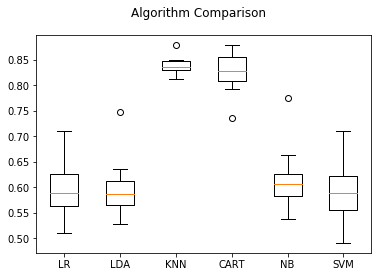

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('Algorithm-Comparison.eps', format='eps', dpi=1000)
plt.show()

## Make predictions with KNN and validation dataset

In [22]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.ravel())
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation.ravel(), predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8277153558052435
[[78  6  1  0  1  1]
 [ 2 97  1  2  1  0]
 [ 4  4  9  4  2  0]
 [ 0  5  0  4  2  0]
 [ 0  3  0  0 28  0]
 [ 3  0  1  0  3  5]]
             precision    recall  f1-score   support

        1.0       0.90      0.90      0.90        87
        2.0       0.84      0.94      0.89       103
        3.0       0.75      0.39      0.51        23
        4.0       0.40      0.36      0.38        11
        5.0       0.76      0.90      0.82        31
        6.0       0.83      0.42      0.56        12

avg / total       0.82      0.83      0.82       267



## Make predictions with CART and validation dataset

In [23]:
# Make predictions on validation dataset
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train.ravel())
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation.ravel(), predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8127340823970037
[[73  7  2  1  0  4]
 [ 3 96  2  1  1  0]
 [ 1  7  9  4  2  0]
 [ 0  3  1  5  2  0]
 [ 0  2  0  0 27  2]
 [ 3  1  0  0  1  7]]
             precision    recall  f1-score   support

        1.0       0.91      0.84      0.87        87
        2.0       0.83      0.93      0.88       103
        3.0       0.64      0.39      0.49        23
        4.0       0.45      0.45      0.45        11
        5.0       0.82      0.87      0.84        31
        6.0       0.54      0.58      0.56        12

avg / total       0.81      0.81      0.81       267



## Make prediction with kNN and Node Nr.3

In [24]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.ravel())
predictions = knn.predict(X3_validation)
print(accuracy_score(Y3_validation, predictions))
print(confusion_matrix(Y3_validation, predictions))
print(classification_report(Y3_validation, predictions))

0.7784431137724551
[[ 70   8   2   0   0   1]
 [  0 167  17   7   3   0]
 [  4   9  12   0   2   0]
 [  0   7   2   4   1   0]
 [  0   3   0   0   4   1]
 [  5   0   0   0   2   3]]
             precision    recall  f1-score   support

        1.0       0.89      0.86      0.87        81
        2.0       0.86      0.86      0.86       194
        3.0       0.36      0.44      0.40        27
        4.0       0.36      0.29      0.32        14
        5.0       0.33      0.50      0.40         8
        6.0       0.60      0.30      0.40        10

avg / total       0.79      0.78      0.78       334



## Add the predictions column to the original Node 3 dataset

In [25]:
dataset_node3['predictions'] = predictions.tolist()

/Users/patricio/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Printing Data for Node Nr.3

En esta grafica pasa lo siguiente.

In [26]:
import matplotlib.pyplot as plt
import smartharvest as sh

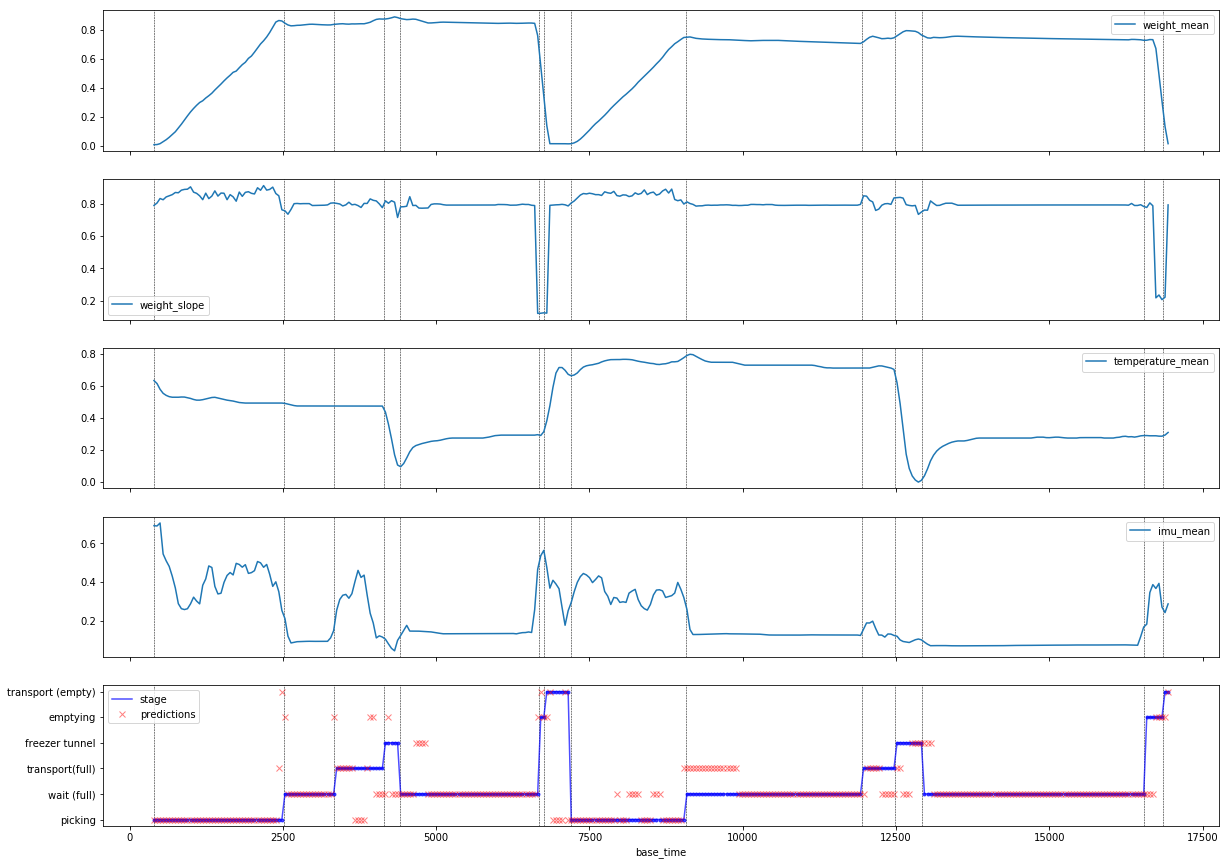

In [27]:
    # Plot the results
    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(5,1,sharey=False,sharex='col',figsize=(20,15))

    # Get the vertical lines defining the harvest stages
    df_lines = pandas.read_csv("lines_nodes.csv", sep=',', header=0, index_col=0)
    lines_node_array = df_lines.loc["n3"]

    # Add vertical lines to the graphs
    
    dataset_node3.plot(x='base_time', y='weight_mean', ax=ax0)
    patch = sh.print_harvest_lines(ax0, lines_node_array, 'vertical')
    ax0.add_patch(patch)
    
    dataset_node3.plot(x='base_time', y='weight_slope', ax=ax1)
    patch = sh.print_harvest_lines(ax1, lines_node_array, 'vertical')
    ax1.add_patch(patch)

    dataset_node3.plot(x='base_time', y='temperature_mean', ax=ax2)
    patch = sh.print_harvest_lines(ax2, lines_node_array, 'vertical')
    ax2.add_patch(patch)

    dataset_node3.plot(x='base_time', y='imu_mean', ax=ax3)
    patch = sh.print_harvest_lines(ax3, lines_node_array, 'vertical')
    ax3.add_patch(patch)

    dataset_node3.plot(x='base_time', y='stage', ax=ax4, style='.-b', alpha=0.7)
    ax4.set_yticklabels(['','picking', 'wait (full)', 'transport(full)', 'freezer tunnel', 'emptying', 'transport (empty)'])
    dataset_node3.plot(x='base_time', y='predictions', ax=ax4, style='xr', alpha=0.5)
    patch = sh.print_harvest_lines(ax4, lines_node_array, 'vertical')
    ax4.add_patch(patch)

    plt.show()

## Node Nr.3 : Modelled vs. Real harvest stages

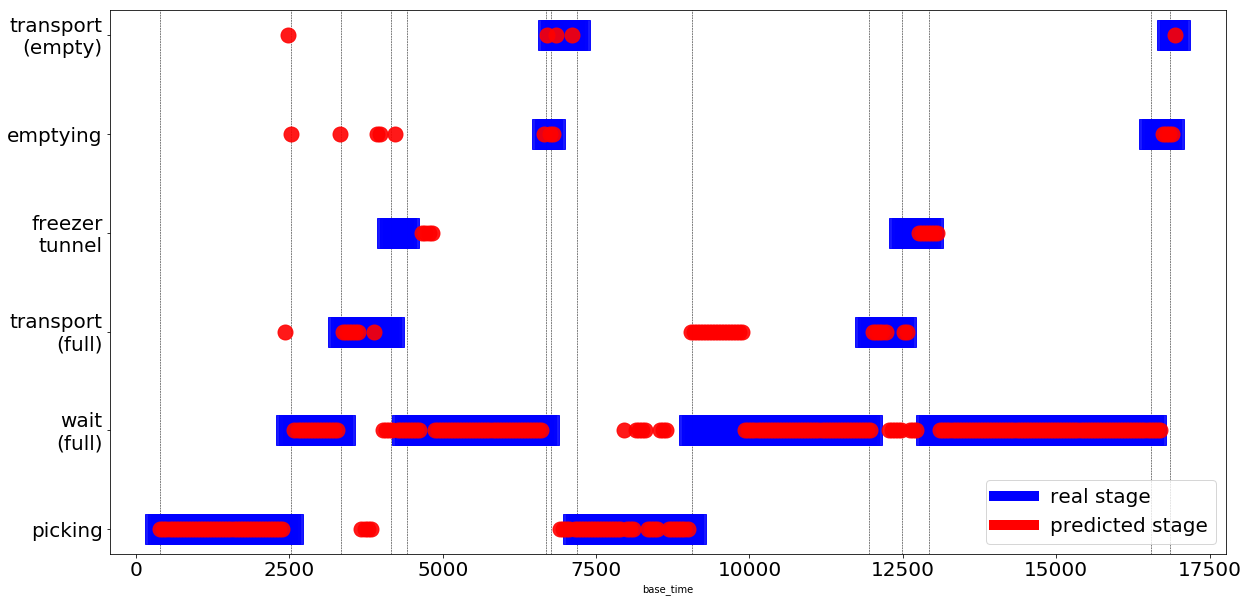

In [28]:
from matplotlib.lines import Line2D

# Plot the results
plt.rc('legend', fontsize=20)
figp, axp = plt.subplots(1,1,sharey=False,sharex='col',figsize=(20,10))

# Plot real data
dataset_node3.plot(x='base_time', y='stage', ax=axp, style='sb', alpha=0.9, ms=30)

# Set Y-Axis labels
axp.set_yticklabels(['','picking', 'wait\n(full)', 'transport\n(full)', 'freezer\ntunnel', 'emptying', 'transport\n(empty)'])

# Plot predited data
dataset_node3.plot(x='base_time', y='predictions', ax=axp, style='or',  alpha=0.9, ms=15, fontsize=20)

# Redefine leyend
custom_lines = [Line2D([0], [0], color='blue', lw=10), Line2D([0], [0], color='red', lw=10)]
axp.legend(custom_lines, ['real stage', 'predicted stage'])

# Add vertical lines
patch = sh.print_harvest_lines(axp, lines_node_array, 'vertical')
axp.add_patch(patch)

plt.savefig('fig-model-versus-real_N3.eps', format='eps', dpi=1000)
plt.show()
